# DECISION TREE CLASSIFICATION

IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pyplot
####### today's main library
from sklearn.tree import DecisionTreeClassifier
######
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

GIVING COLUMN NAMES AS DATA DO NOT HAVE ANY COLUMN NAME

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']


LOADING DATA WITH HEADER=0 MEANS THERS IS NO COLUMN HEADING AND THEREFORE WE ARE GIVING NAMES AS COL_NAMES

In [3]:
data=pd.read_csv('/content/drive/My Drive/data/pima-indians-diabetes.csv',header=None,names=col_names)
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


FINDING CORELATION BETWEEN DATA BY USING CORR() FUNCTION

In [4]:
data.corr()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
label,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


EXTRACTING RELEVENT COLUMNS(FEATURE EXTRACTION)

In [5]:

feature_col=['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
features=data[feature_col]
target=data['label']

SPILTING DATA INTO TRAIN AND TEST

In [6]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=None)

TRAINING

In [7]:
model=DecisionTreeClassifier()
model=model.fit(features_train,target_train)

PREDICTION

In [8]:
predictions=model.predict(features_test)

CONFUSION MATRIX

In [9]:
print(confusion_matrix(target_test,predictions))
print(accuracy_score(target_test,predictions))

[[102   0]
 [  0  52]]
1.0


HEATMAP VISUALIZATION

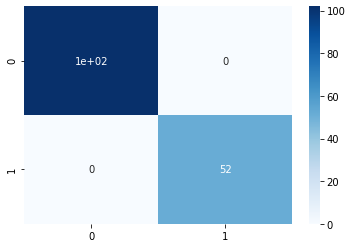

In [10]:
import seaborn as sns
sns.heatmap(confusion_matrix(target_test,predictions),annot=True,cmap='Blues')

VISUALIZING DECISION TREE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


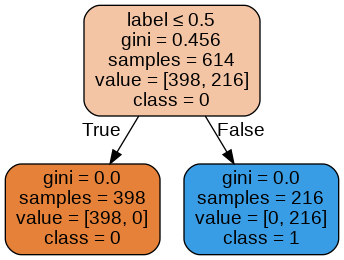

In [11]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_col,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())
